# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
%matplotlib inline

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
folder_name = 'ana'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response   

<Response [200]>

In [5]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
df2=pd.read_csv('C:/Users/mirabel/Downloads/ana/image-predictions.tsv',sep='\t')
df2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = df1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
import json

df_list = []

with open('tweet-json copy.txt', 'r') as tweet_data:
     for line in tweet_data:
        data = json.loads(line)       
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']

        df_list.append({'tweet_id' : tweet_id, 'date_created' : created_at, 'favorite_count' : favorite_count, 'retweet_count' : retweet_count})

API_df = pd.DataFrame (df_list, columns = ['tweet_id', 'date_created', 'favorite_count',  'retweet_count'])
API_df               

tweet_id                    date_created  favorite_count  \
0     892420643555336193  Tue Aug 01 16:23:56 +0000 2017           39467   
1     892177421306343426  Tue Aug 01 00:17:27 +0000 2017           33819   
2     891815181378084864  Mon Jul 31 00:18:03 +0000 2017           25461   
3     891689557279858688  Sun Jul 30 15:58:51 +0000 2017           42908   
4     891327558926688256  Sat Jul 29 16:00:24 +0000 2017           41048   
...                  ...                             ...             ...   
2349  666049248165822465  Mon Nov 16 00:24:50 +0000 2015             111   
2350  666044226329800704  Mon Nov 16 00:04:52 +0000 2015             311   
2351  666033412701032449  Sun Nov 15 23:21:54 +0000 2015             128   
2352  666029285002620928  Sun Nov 15 23:05:30 +0000 2015             132   
2353  666020888022790149  Sun Nov 15 22:32:08 +0000 2015            2535   

      retweet_count  
0              8853  
1              6514  
2              4328  
3              8964  
4              9774  
...             ...  
2349             41  
2350            147  
2351             47  
2352             48  
2353            532  

[2354 rows x 4 columns]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
df1

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [10]:
df2

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [11]:
API_df

tweet_id                    date_created  favorite_count  \
0     892420643555336193  Tue Aug 01 16:23:56 +0000 2017           39467   
1     892177421306343426  Tue Aug 01 00:17:27 +0000 2017           33819   
2     891815181378084864  Mon Jul 31 00:18:03 +0000 2017           25461   
3     891689557279858688  Sun Jul 30 15:58:51 +0000 2017           42908   
4     891327558926688256  Sat Jul 29 16:00:24 +0000 2017           41048   
...                  ...                             ...             ...   
2349  666049248165822465  Mon Nov 16 00:24:50 +0000 2015             111   
2350  666044226329800704  Mon Nov 16 00:04:52 +0000 2015             311   
2351  666033412701032449  Sun Nov 15 23:21:54 +0000 2015             128   
2352  666029285002620928  Sun Nov 15 23:05:30 +0000 2015             132   
2353  666020888022790149  Sun Nov 15 22:32:08 +0000 2015            2535   

      retweet_count  
0              8853  
1              6514  
2              4328  
3              8964  
4              9774  
...             ...  
2349             41  
2350            147  
2351             47  
2352             48  
2353            532  

[2354 rows x 4 columns]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   date_created    2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [15]:
df1.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
180   857062103051644929                    NaN                  NaN   
1925  674063288070742018                    NaN                  NaN   
1996  672591762242805761                    NaN                  NaN   
401   824663926340194305                    NaN                  NaN   
1888  674781762103414784                    NaN                  NaN   

                      timestamp  \
180   2017-04-26 02:41:43 +0000   
1925  2015-12-08 03:09:46 +0000   
1996  2015-12-04 01:42:26 +0000   
401   2017-01-26 17:02:56 +0000   
1888  2015-12-10 02:44:43 +0000   

                                                 source  \
180   <a href="http://twitter.com/download/iphone" r...   
1925  <a href="http://twitter.com/download/iphone" r...   
1996  <a href="http://twitter.com/download/iphone" r...   
401   <a href="http://twitter.com/download/iphone" r...   
1888  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
180   RT @AaronChewning: First time wearing my @dog_...         8.570611e+17   
1925  This is Earl. Earl is lost. Someone help Earl....                  NaN   
1996  This is Taz. He boxes leaves. 10/10 https://t....                  NaN   
401   This is Wilson. Named after the volleyball. He...                  NaN   
1888  Bedazzled pup here. Fashionable af. Super yell...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
180                 58709723.0  2017-04-26 02:37:47 +0000   
1925                       NaN                        NaN   
1996                       NaN                        NaN   
401                        NaN                        NaN   
1888                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
180   https://twitter.com/AaronChewning/status/85706...                13   
1925  https://twitter.com/dog_rates/status/674063288...                 5   
1996  https://twitter.com/dog_rates/status/672591762...                10   
401   https://twitter.com/dog_rates/status/824663926...                13   
1888  https://twitter.com/dog_rates/status/674781762...                 8   

      rating_denominator    name doggo floofer pupper puppo  
180                   10    None  None    None   None  None  
1925                  10    Earl  None    None   None  None  
1996                  10     Taz  None    None   None  None  
401                   10  Wilson  None    None   None  None  
1888                  10    None  None    None   None  None

In [16]:
all_columns=pd.Series(list(df1) + list(df2) + list(API_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
1. df1: missing retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp values 

2. df1:Timestamp should be of data type date-time, tweet_id should be of data type string, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers. Tweet_id should have string data type. API_df: date_created should be of data type date-time

3. df1: Invalid dog names

4. df1: None in doggo, floofer, pupper and puppo columns is treated as a non-null value.

5. df2: non-descriptive column headers p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf,	p3_dog

6. df1: html tags in the source column makes it hard to read.

7. df1: Not all the data are dog ratings, some are retweets

8. Retweet columns need to be removed as they are not needed.



### Tidiness issues
1. df1: dog names doggo, floofer, pupper and puppo should be in one column.
2. All dataframes should be merged into one master dataframe.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [121]:
df1_clean= df1.copy()
df2_clean= df2.copy()
API_df_clean= API_df.copy()


### Issue #1: Null values in columns

In [122]:
df1_clean.isnull()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  timestamp  source  \
0        False                   True                 True      False   False   
1        False                   True                 True      False   False   
2        False                   True                 True      False   False   
3        False                   True                 True      False   False   
4        False                   True                 True      False   False   
...        ...                    ...                  ...        ...     ...   
2351     False                   True                 True      False   False   
2352     False                   True                 True      False   False   
2353     False                   True                 True      False   False   
2354     False                   True                 True      False   False   
2355     False                   True                 True      False   False   

       text  retweeted_status_id  retweeted_status_user_id  \
0     False                 True                      True   
1     False                 True                      True   
2     False                 True                      True   
3     False                 True                      True   
4     False                 True                      True   
...     ...                  ...                       ...   
2351  False                 True                      True   
2352  False                 True                      True   
2353  False                 True                      True   
2354  False                 True                      True   
2355  False                 True                      True   

      retweeted_status_timestamp  expanded_urls  rating_numerator  \
0                           True          False             False   
1                           True          False             False   
2                           True          False             False   
3                           True          False             False   
4                           True          False             False   
...                          ...            ...               ...   
2351                        True          False             False   
2352                        True          False             False   
2353                        True          False             False   
2354                        True          False             False   
2355                        True          False             False   

      rating_denominator   name  doggo  floofer  pupper  puppo  
0                  False  False  False    False   False  False  
1                  False  False  False    False   False  False  
2                  False  False  False    False   False  False  
3                  False  False  False    False   False  False  
4                  False  False  False    False   False  False  
...                  ...    ...    ...      ...     ...    ...  
2351               False  False  False    False   False  False  
2352               False  False  False    False   False  False  
2353               False  False  False    False   False  False  
2354               False  False  False    False   False  False  
2355               False  False  False    False   False  False  

[2356 rows x 17 columns]

#### Define: Fill rows with missing values in df1 with '0'.

#### Code

In [123]:
df1_clean[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',	'retweeted_status_user_id',	'retweeted_status_timestamp'	]] = df1_clean[['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',	'retweeted_status_user_id',	'retweeted_status_timestamp'	]].fillna(0)

  


#### Test

In [124]:
df1_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    0.0                  0.0   
1  892177421306343426                    0.0                  0.0   
2  891815181378084864                    0.0                  0.0   
3  891689557279858688                    0.0                  0.0   
4  891327558926688256                    0.0                  0.0   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  0.0   
1  This is Tilly. She's just checking pup on you....                  0.0   
2  This is Archie. He is a rare Norwegian Pouncin...                  0.0   
3  This is Darla. She commenced a snooze mid meal...                  0.0   
4  This is Franklin. He would like you to stop ca...                  0.0   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       0.0                          0   
1                       0.0                          0   
2                       0.0                          0   
3                       0.0                          0   
4                       0.0                          0   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Issue # 2:  Wrong data types in df1, df2 and API_df

In [125]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       2356 non-null   float64
 2   in_reply_to_user_id         2356 non-null   float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   float64
 7   retweeted_status_user_id    2356 non-null   float64
 8   retweeted_status_timestamp  2356 non-null   object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [126]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [127]:
API_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   date_created    2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


#### Define: Change columns to appropriate data type. (1) all ID columns (e.g. tweet_id) should have string datatype (2) all categorical variables should have category datatype (3) all time related columns should have datetime datatype (4) columns like numerator and denominator should float data type. 

#### Code

In [128]:
df1_clean = df1_clean.astype({"tweet_id" : 'str', "in_reply_to_status_id" : 'int64', "in_reply_to_user_id" : 'int64', "retweeted_status_id" : 'int64',"retweeted_status_user_id" : 'int64', "timestamp" : 'datetime64',"rating_numerator" : 'float64', "rating_denominator" : 'float64' })
                        

In [129]:
df2_clean = df2_clean.astype({"tweet_id" : 'str'})

In [130]:
API_df_clean = API_df_clean.astype({"tweet_id" : 'str', "date_created" : 'datetime64'})

#### Test

In [131]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       2356 non-null   int64         
 2   in_reply_to_user_id         2356 non-null   int64         
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         2356 non-null   int64         
 7   retweeted_status_user_id    2356 non-null   int64         
 8   retweeted_status_timestamp  2356 non-null   object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   float64       
 11  rating_denominator          2356 non-null   float64     

In [132]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [133]:
API_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2354 non-null   object        
 1   date_created    2354 non-null   datetime64[ns]
 2   favorite_count  2354 non-null   int64         
 3   retweet_count   2354 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 73.7+ KB


### Issue # 3: Invalid dog names

In [134]:
df1_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                      0                    0   
1     892177421306343426                      0                    0   
2     891815181378084864                      0                    0   
3     891689557279858688                      0                    0   
4     891327558926688256                      0                    0   
...                  ...                    ...                  ...   
2351  666049248165822465                      0                    0   
2352  666044226329800704                      0                    0   
2353  666033412701032449                      0                    0   
2354  666029285002620928                      0                    0   
2355  666020888022790149                      0                    0   

               timestamp                                             source  \
0    2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1    2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2    2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3    2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4    2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   
...                  ...                                                ...   
2351 2015-11-16 00:24:50  <a href="http://twitter.com/download/iphone" r...   
2352 2015-11-16 00:04:52  <a href="http://twitter.com/download/iphone" r...   
2353 2015-11-15 23:21:54  <a href="http://twitter.com/download/iphone" r...   
2354 2015-11-15 23:05:30  <a href="http://twitter.com/download/iphone" r...   
2355 2015-11-15 22:32:08  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                    0   
1     This is Tilly. She's just checking pup on you....                    0   
2     This is Archie. He is a rare Norwegian Pouncin...                    0   
3     This is Darla. She commenced a snooze mid meal...                    0   
4     This is Franklin. He would like you to stop ca...                    0   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                    0   
2352  This is a purebred Piers Morgan. Loves to Netf...                    0   
2353  Here is a very happy pup. Big fan of well-main...                    0   
2354  This is a western brown Mitsubishi terrier. Up...                    0   
2355  Here we have a Japanese Irish Setter. Lost eye...                    0   

      retweeted_status_user_id retweeted_status_timestamp  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
2351                         0                          0   
2352                         0                          0   
2353                         0                          0   
2354                         0                          0   
2355                         0                          0   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892177421...              13.0   
2     https://twitter.com/dog_rates/status/891815181...              12.0   
3     https://twitter.com/dog_rates/status/891689557...              13.0   
4     https://twitter.com/dog_rates/status/891327558...              12.0   
...                                           

#### Define: Capitalize dog names

#### Code:

In [135]:
df1_clean['name'] = df1_clean['name'].str.capitalize()

#### Test

In [136]:
df1_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                      0                    0   
1     892177421306343426                      0                    0   
2     891815181378084864                      0                    0   
3     891689557279858688                      0                    0   
4     891327558926688256                      0                    0   
...                  ...                    ...                  ...   
2351  666049248165822465                      0                    0   
2352  666044226329800704                      0                    0   
2353  666033412701032449                      0                    0   
2354  666029285002620928                      0                    0   
2355  666020888022790149                      0                    0   

               timestamp                                             source  \
0    2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1    2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2    2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3    2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4    2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   
...                  ...                                                ...   
2351 2015-11-16 00:24:50  <a href="http://twitter.com/download/iphone" r...   
2352 2015-11-16 00:04:52  <a href="http://twitter.com/download/iphone" r...   
2353 2015-11-15 23:21:54  <a href="http://twitter.com/download/iphone" r...   
2354 2015-11-15 23:05:30  <a href="http://twitter.com/download/iphone" r...   
2355 2015-11-15 22:32:08  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                    0   
1     This is Tilly. She's just checking pup on you....                    0   
2     This is Archie. He is a rare Norwegian Pouncin...                    0   
3     This is Darla. She commenced a snooze mid meal...                    0   
4     This is Franklin. He would like you to stop ca...                    0   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                    0   
2352  This is a purebred Piers Morgan. Loves to Netf...                    0   
2353  Here is a very happy pup. Big fan of well-main...                    0   
2354  This is a western brown Mitsubishi terrier. Up...                    0   
2355  Here we have a Japanese Irish Setter. Lost eye...                    0   

      retweeted_status_user_id retweeted_status_timestamp  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
2351                         0                          0   
2352                         0                          0   
2353                         0                          0   
2354                         0                          0   
2355                         0                          0   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892177421...              13.0   
2     https://twitter.com/dog_rates/status/891815181...              12.0   
3     https://twitter.com/dog_rates/status/891689557...              13.0   
4     https://twitter.com/dog_rates/status/891327558...              12.0   
...                                           

### Issue # 4: None in doggo, floofer, pupper and puppo columns is treated as a non-null value.

In [137]:
df1_clean.isnull()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  timestamp  source  \
0        False                  False                False      False   False   
1        False                  False                False      False   False   
2        False                  False                False      False   False   
3        False                  False                False      False   False   
4        False                  False                False      False   False   
...        ...                    ...                  ...        ...     ...   
2351     False                  False                False      False   False   
2352     False                  False                False      False   False   
2353     False                  False                False      False   False   
2354     False                  False                False      False   False   
2355     False                  False                False      False   False   

       text  retweeted_status_id  retweeted_status_user_id  \
0     False                False                     False   
1     False                False                     False   
2     False                False                     False   
3     False                False                     False   
4     False                False                     False   
...     ...                  ...                       ...   
2351  False                False                     False   
2352  False                False                     False   
2353  False                False                     False   
2354  False                False                     False   
2355  False                False                     False   

      retweeted_status_timestamp  expanded_urls  rating_numerator  \
0                          False          False             False   
1                          False          False             False   
2                          False          False             False   
3                          False          False             False   
4                          False          False             False   
...                          ...            ...               ...   
2351                       False          False             False   
2352                       False          False             False   
2353                       False          False             False   
2354                       False          False             False   
2355                       False          False             False   

      rating_denominator   name  doggo  floofer  pupper  puppo  
0                  False  False  False    False   False  False  
1                  False  False  False    False   False  False  
2                  False  False  False    False   False  False  
3                  False  False  False    False   False  False  
4                  False  False  False    False   False  False  
...                  ...    ...    ...      ...     ...    ...  
2351               False  False  False    False   False  False  
2352               False  False  False    False   False  False  
2353               False  False  False    False   False  False  
2354               False  False  False    False   False  False  
2355               False  False  False    False   False  False  

[2356 rows x 17 columns]

#### Define : Replace None with null values

#### Code

In [138]:
df1_clean.doggo.replace('None', '', inplace=True)

In [139]:
df1_clean.floofer.replace('None', '', inplace=True)

In [140]:
df1_clean.pupper.replace('None', '', inplace=True)

In [141]:
df1_clean.puppo.replace('None', '', inplace=True)

#### Test

In [142]:
df1_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                      0                    0   
1  892177421306343426                      0                    0   
2  891815181378084864                      0                    0   
3  891689557279858688                      0                    0   
4  891327558926688256                      0                    0   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                    0   
1  This is Tilly. She's just checking pup on you....                    0   
2  This is Archie. He is a rare Norwegian Pouncin...                    0   
3  This is Darla. She commenced a snooze mid meal...                    0   
4  This is Franklin. He would like you to stop ca...                    0   

   retweeted_status_user_id retweeted_status_timestamp  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name doggo floofer pupper puppo  
0                10.0   Phineas                             
1                10.0     Tilly                             
2                10.0    Archie                             
3                10.0     Darla                             
4                10.0  Franklin

### Issue # 5: non-descriptive column headers p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf,	p3_dog

In [143]:
df2_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### Define: Change column headers to descriptive

#### Code

In [144]:
df2_clean = df2_clean.rename(columns = {'p1':'#1_prediction', 'p1_conf' : '#1_prediction_confidence', 'p1_dog' : '#1_prediction_validity', 'p2' : '#2_prediction', 'p2_conf' : '#2_prediction_confidence', 'p2_dog' : '#2_prediction_validity',
                                        'p3' : '#3_prediction', 'p3_conf' : '#3_prediction_confidence', 'p3_dog' : '#3_prediction_validity' })

#### Test

In [145]:
df2_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num           #1_prediction  #1_prediction_confidence  \
0        1  Welsh_springer_spaniel                  0.465074   
1        1                 redbone                  0.506826   
2        1         German_shepherd                  0.596461   
3        1     Rhodesian_ridgeback                  0.408143   
4        1      miniature_pinscher                  0.560311   

   #1_prediction_validity       #2_prediction  #2_prediction_confidence  \
0                    True              collie                  0.156665   
1                    True  miniature_pinscher                  0.074192   
2                    True            malinois                  0.138584   
3                    True             redbone                  0.360687   
4                    True          Rottweiler                  0.243682   

   #2_prediction_validity        #3_prediction  #3_prediction_confidence  \
0                    True    Shetland_sheepdog                  0.061428   
1                    True  Rhodesian_ridgeback                  0.072010   
2                    True           bloodhound                  0.116197   
3                    True   miniature_pinscher                  0.222752   
4                    True             Doberman                  0.154629   

   #3_prediction_validity  
0                    True  
1                    True  
2                    True  
3                    True  
4                    True

### Issue # 6: html tags in the source column makes it hard to read.

In [146]:
df1_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                      0                    0   
1  892177421306343426                      0                    0   
2  891815181378084864                      0                    0   
3  891689557279858688                      0                    0   
4  891327558926688256                      0                    0   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                    0   
1  This is Tilly. She's just checking pup on you....                    0   
2  This is Archie. He is a rare Norwegian Pouncin...                    0   
3  This is Darla. She commenced a snooze mid meal...                    0   
4  This is Franklin. He would like you to stop ca...                    0   

   retweeted_status_user_id retweeted_status_timestamp  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name doggo floofer pupper puppo  
0                10.0   Phineas                             
1                10.0     Tilly                             
2                10.0    Archie                             
3                10.0     Darla                             
4                10.0  Franklin

#### Define: Remove html tags from source column to make it more readable

#### Code

In [147]:
import re 
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df1_clean['with_out_tags']=df1_clean['source'].apply(lambda cw : remove_tags(cw))

#### Test

In [154]:
df1_clean = df1_clean.drop(['source'], axis=1)

### Issue # 7:  Not all the data are dog ratings, some are retweets

#### Define: Filter data to get data with retweeted status id, user id and status timestamp as zero 

#### Code

In [155]:
df1_clean = df1_clean[df1_clean.retweeted_status_id == 0]

In [156]:
df1_clean = df1_clean[df1_clean.retweeted_status_user_id == 0]

In [157]:
df1_clean = df1_clean[df1_clean.retweeted_status_timestamp == 0]

#### Test

In [158]:
df1_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                      0                    0   
1  892177421306343426                      0                    0   
2  891815181378084864                      0                    0   
3  891689557279858688                      0                    0   
4  891327558926688256                      0                    0   

            timestamp                                               text  \
0 2017-08-01 16:23:56  This is Phineas. He's a mystical boy. Only eve...   
1 2017-08-01 00:17:27  This is Tilly. She's just checking pup on you....   
2 2017-07-31 00:18:03  This is Archie. He is a rare Norwegian Pouncin...   
3 2017-07-30 15:58:51  This is Darla. She commenced a snooze mid meal...   
4 2017-07-29 16:00:24  This is Franklin. He would like you to stop ca...   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                    0                         0                          0   
1                    0                         0                          0   
2                    0                         0                          0   
3                    0                         0                          0   
4                    0                         0                          0   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name doggo floofer pupper puppo       with_out_tags  
0                10.0   Phineas                             Twitter for iPhone  
1                10.0     Tilly                             Twitter for iPhone  
2                10.0    Archie                             Twitter for iPhone  
3                10.0     Darla                             Twitter for iPhone  
4                10.0  Franklin                             Twitter for iPhone

### Issue # 8: Retweet columns need to be removed as they are not needed.

In [159]:
df1_clean.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                      0                    0   
2352  666044226329800704                      0                    0   
2353  666033412701032449                      0                    0   
2354  666029285002620928                      0                    0   
2355  666020888022790149                      0                    0   

               timestamp                                               text  \
2351 2015-11-16 00:24:50  Here we have a 1949 1st generation vulpix. Enj...   
2352 2015-11-16 00:04:52  This is a purebred Piers Morgan. Loves to Netf...   
2353 2015-11-15 23:21:54  Here is a very happy pup. Big fan of well-main...   
2354 2015-11-15 23:05:30  This is a western brown Mitsubishi terrier. Up...   
2355 2015-11-15 22:32:08  Here we have a Japanese Irish Setter. Lost eye...   

      retweeted_status_id  retweeted_status_user_id  \
2351                    0                         0   
2352                    0                         0   
2353                    0                         0   
2354                    0                         0   
2355                    0                         0   

     retweeted_status_timestamp  \
2351                          0   
2352                          0   
2353                          0   
2354                          0   
2355                          0   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...               5.0   
2352  https://twitter.com/dog_rates/status/666044226...               6.0   
2353  https://twitter.com/dog_rates/status/666033412...               9.0   
2354  https://twitter.com/dog_rates/status/666029285...               7.0   
2355  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator  name doggo floofer pupper puppo       with_out_tags  
2351                10.0  None                             Twitter for iPhone  
2352                10.0     A                             Twitter for iPhone  
2353                10.0     A                             Twitter for iPhone  
2354                10.0     A                             Twitter for iPhone  
2355                10.0  None                             Twitter for iPhone

#### Define : drop retweet columns in the dataframe

#### Code

In [160]:
df1_clean = df1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [161]:
df1_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                      0                    0   
1  892177421306343426                      0                    0   
2  891815181378084864                      0                    0   
3  891689557279858688                      0                    0   
4  891327558926688256                      0                    0   

            timestamp                                               text  \
0 2017-08-01 16:23:56  This is Phineas. He's a mystical boy. Only eve...   
1 2017-08-01 00:17:27  This is Tilly. She's just checking pup on you....   
2 2017-07-31 00:18:03  This is Archie. He is a rare Norwegian Pouncin...   
3 2017-07-30 15:58:51  This is Darla. She commenced a snooze mid meal...   
4 2017-07-29 16:00:24  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name doggo floofer pupper puppo       with_out_tags  
0                10.0   Phineas                             Twitter for iPhone  
1                10.0     Tilly                             Twitter for iPhone  
2                10.0    Archie                             Twitter for iPhone  
3                10.0     Darla                             Twitter for iPhone  
4                10.0  Franklin                             Twitter for iPhone

# Tidy Issue # 1: dog names doggo, floofer, pupper and puppo should be in one column

In [162]:
df1_clean.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                      0                    0   
2352  666044226329800704                      0                    0   
2353  666033412701032449                      0                    0   
2354  666029285002620928                      0                    0   
2355  666020888022790149                      0                    0   

               timestamp                                               text  \
2351 2015-11-16 00:24:50  Here we have a 1949 1st generation vulpix. Enj...   
2352 2015-11-16 00:04:52  This is a purebred Piers Morgan. Loves to Netf...   
2353 2015-11-15 23:21:54  Here is a very happy pup. Big fan of well-main...   
2354 2015-11-15 23:05:30  This is a western brown Mitsubishi terrier. Up...   
2355 2015-11-15 22:32:08  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...               5.0   
2352  https://twitter.com/dog_rates/status/666044226...               6.0   
2353  https://twitter.com/dog_rates/status/666033412...               9.0   
2354  https://twitter.com/dog_rates/status/666029285...               7.0   
2355  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator  name doggo floofer pupper puppo       with_out_tags  
2351                10.0  None                             Twitter for iPhone  
2352                10.0     A                             Twitter for iPhone  
2353                10.0     A                             Twitter for iPhone  
2354                10.0     A                             Twitter for iPhone  
2355                10.0  None                             Twitter for iPhone

#### Define: Merge doggo, floofer, pupper and puppo into one column

#### Code

In [163]:
df1_clean['stage'] = df1_clean['doggo'] + df1_clean['floofer'] + df1_clean['pupper'] + df1_clean['puppo']

In [164]:
df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
df1_clean.loc[df1_clean.stage == 'pupperdoggo', 'stage'] = 'pupper,doggo'
df1_clean.loc[df1_clean.stage == 'pupperpuppo', 'stage'] = 'pupper,puppo'
df1_clean.loc[df1_clean.stage == 'pupperfloofer', 'stage'] = 'pupperfloofer'
df1_clean.loc[df1_clean.stage == 'flooferdoggo', 'stage'] = 'floofer,doggo'
df1_clean.loc[df1_clean.stage == 'flooferpupper', 'stage'] = 'floofer,pupper'
df1_clean.loc[df1_clean.stage == 'flooferpuppo', 'stage'] = 'floofer,puppo'
df1_clean.loc[df1_clean.stage == 'puppodoggo', 'stage'] = 'puppo,doggo'
df1_clean.loc[df1_clean.stage == 'puppofloofer', 'stage'] = 'puppo,floofer'
df1_clean.loc[df1_clean.stage == 'puppopupper', 'stage'] = 'puppo,pupper'

In [165]:
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [166]:
df1_clean.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1271  709409458133323776                      0                    0   
1600  686007916130873345                      0                    0   
823   770069151037685760                      0                    0   
1310  707038192327901184                      0                    0   
321   834209720923721728                      0                    0   
1666  682697186228989953                      0                    0   
985   749075273010798592                      0                    0   
1121  730924654643314689                      0                    0   
1469  694183373896572928                      0                    0   
2123  670385711116361728                      0                    0   
2024  671891728106971137                      0                    0   
1204  716080869887381504                      0                    0   
1553  688908934925697024                      0                    0   
486   814530161257443328                      0                    0   
1080  738891149612572673     738411919896285184            358972768   
299   836989968035819520                      0                    0   
1574  687480748861947905                      0                    0   
87    875144289856114688                      0                    0   
1960  673363615379013632                      0                    0   
323   834089966724603904                      0                    0   

               timestamp                                               text  \
1271 2016-03-14 16:02:49  This is Billy. He sensed a squirrel. 8/10 damn...   
1600 2016-01-10 02:13:27  This pupper has a magical eye. 11/10 I can't s...   
823  2016-08-29 01:22:47  Say hello to Carbon. This is his first time sw...   
1310 2016-03-08 03:00:15  This is Kathmandu. He sees every move you make...   
321  2017-02-22 01:14:30  This is Wilson. He's aware that he has somethi...   
1666 2015-12-31 22:57:47  NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...   
985  2016-07-02 03:00:36  This is Boomer. He's self-baptizing. Other dog...   
1121 2016-05-13 00:56:32  We only rate dogs. Pls stop sending non-canine...   
1469 2016-02-01 15:39:48  This is Lola. She realized mid hug that she's ...   
2123 2015-11-27 23:36:23  Meet Larry. He's a Panoramic Benzoate. Can sho...   
2024 2015-12-02 03:20:45  This is Mojo. Apparently he's too cute for a s...   
1204 2016-04-02 01:52:38  Here's a super majestic doggo and a sunset 11/...   
1553 2016-01-18 02:21:04  Meet Clarence. He does parkour. 8/10 very tale...   
486  2016-12-29 17:54:58  This is Alf. Someone just rubbed a balloon on ...   
1080 2016-06-04 00:32:32                                 @mount_alex3 13/10   
299  2017-03-01 17:22:13  This is Mookie. He really enjoys shopping but ...   
1574 2016-01-14 03:45:57  Another magnificent photo. 12/10 https://t.co/...   
87   2017-06-15 00:13:52  Meet Nugget and Hank. Nugget took Hank's bone....   
1960 2015-12-06 04:49:31  This little pupper can't wait for Christmas. H...   
323  2017-02-21 17:18:39  DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...   

                                          expanded_urls  rating_numerator  \
1271  https://twitter.com/dog_rates/status/709409458...               8.0   
1600  https://twitter.com/dog_rates/status/686007916...              11.0   
823   https://twitter.com/dog_rates/status/770069151...              10.0   
1310  https://twitter.com/dog_rates/status/707038192...              10.0   
321   https://twitter.com/dog_rates/status/834209720...              12.0   
1666  https://twitter.com/dog_rates/status/682697186...              12.0   
985                       https://vine.co/v/5ztZvHgI17r              11.0   
1121  https://twitter.com/dog_rates/status/730924654...               9.0   
1469  https://twitter.com/dog_rates/status/694183373...               9.0   
2123  https://twitter.com/dog_rates/status/670385711...               8.0

# Tidy Issue # 2

#### Define: merge three datasets on the tweet id column

#### Code:

In [167]:
df_merged = pd.merge(df1_clean, df2_clean, on ='tweet_id', how = 'inner')

In [168]:
all_merged = pd.merge(df_merged,API_df_clean, on ='tweet_id', how = 'inner')

### Test 

In [169]:
all_merged

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                      0                    0   
1     892177421306343426                      0                    0   
2     891815181378084864                      0                    0   
3     891689557279858688                      0                    0   
4     891327558926688256                      0                    0   
...                  ...                    ...                  ...   
1989  666049248165822465                      0                    0   
1990  666044226329800704                      0                    0   
1991  666033412701032449                      0                    0   
1992  666029285002620928                      0                    0   
1993  666020888022790149                      0                    0   

               timestamp                                               text  \
0    2017-08-01 16:23:56  This is Phineas. He's a mystical boy. Only eve...   
1    2017-08-01 00:17:27  This is Tilly. She's just checking pup on you....   
2    2017-07-31 00:18:03  This is Archie. He is a rare Norwegian Pouncin...   
3    2017-07-30 15:58:51  This is Darla. She commenced a snooze mid meal...   
4    2017-07-29 16:00:24  This is Franklin. He would like you to stop ca...   
...                  ...                                                ...   
1989 2015-11-16 00:24:50  Here we have a 1949 1st generation vulpix. Enj...   
1990 2015-11-16 00:04:52  This is a purebred Piers Morgan. Loves to Netf...   
1991 2015-11-15 23:21:54  Here is a very happy pup. Big fan of well-main...   
1992 2015-11-15 23:05:30  This is a western brown Mitsubishi terrier. Up...   
1993 2015-11-15 22:32:08  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892177421...              13.0   
2     https://twitter.com/dog_rates/status/891815181...              12.0   
3     https://twitter.com/dog_rates/status/891689557...              13.0   
4     https://twitter.com/dog_rates/status/891327558...              12.0   
...                                                 ...               ...   
1989  https://twitter.com/dog_rates/status/666049248...               5.0   
1990  https://twitter.com/dog_rates/status/666044226...               6.0   
1991  https://twitter.com/dog_rates/status/666033412...               9.0   
1992  https://twitter.com/dog_rates/status/666029285...               7.0   
1993  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator      name       with_out_tags  ...  \
0                   10.0   Phineas  Twitter for iPhone  ...   
1                   10.0     Tilly  Twitter for iPhone  ...   
2                   10.0    Archie  Twitter for iPhone  ...   
3                   10.0     Darla  Twitter for iPhone  ...   
4                   10.0  Franklin  Twitter for iPhone  ...   
...                  ...       ...                 ...  ...   
1989                10.0      None  Twitter for iPhone  ...   
1990                10.0         A  Twitter for iPhone  ...   
1991                10.0         A  Twitter for iPhone  ...   
1992                10.0         A  Twitter for iPhone  ...   
1993                10.0      None  Twitter for iPhone  ...   

     #1_prediction_validity       #2_prediction  #2_prediction_confidence  \
0                     False               bagel                  0.085851   
1                      True            Pekinese                  0.090647   
2                      True            malamute                  0.078253   
3                     False  Labrador_retriever                  0.168086   
4                      True    English_springer                  0.225770   
...                     ...                 ...           

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [170]:
all_merged.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [171]:
Data = pd.read_csv('twitter_archive_master.csv')
Data.head()

Unnamed: 0            tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0           0  892420643555336193                      0                    0   
1           1  892177421306343426                      0                    0   
2           2  891815181378084864                      0                    0   
3           3  891689557279858688                      0                    0   
4           4  891327558926688256                      0                    0   

             timestamp                                               text  \
0  2017-08-01 16:23:56  This is Phineas. He's a mystical boy. Only eve...   
1  2017-08-01 00:17:27  This is Tilly. She's just checking pup on you....   
2  2017-07-31 00:18:03  This is Archie. He is a rare Norwegian Pouncin...   
3  2017-07-30 15:58:51  This is Darla. She commenced a snooze mid meal...   
4  2017-07-29 16:00:24  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator      name  ... #1_prediction_validity  \
0                10.0   Phineas  ...                  False   
1                10.0     Tilly  ...                   True   
2                10.0    Archie  ...                   True   
3                10.0     Darla  ...                  False   
4                10.0  Franklin  ...                   True   

        #2_prediction #2_prediction_confidence  #2_prediction_validity  \
0               bagel                 0.085851                   False   
1            Pekinese                 0.090647                    True   
2            malamute                 0.078253                    True   
3  Labrador_retriever                 0.168086                    True   
4    English_springer                 0.225770                    True   

                 #3_prediction  #3_prediction_confidence  \
0                       banana                  0.076110   
1                     papillon                  0.068957   
2                       kelpie                  0.031379   
3                      spatula                  0.040836   
4  German_short-haired_pointer                  0.175219   

   #3_prediction_validity         date_created  favorite_count  retweet_count  
0                   False  2017-08-01 16:23:56           39467           8853  
1                    True  2017-08-01 00:17:27           33819           6514  
2                    True  2017-07-31 00:18:03           25461           4328  
3                   False  2017-07-30 15:58:51           42908           8964  
4                    True  2017-07-29 16:00:24           41048           9774  

[5 rows x 26 columns]

In [172]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1994 non-null   int64  
 1   tweet_id                  1994 non-null   int64  
 2   in_reply_to_status_id     1994 non-null   int64  
 3   in_reply_to_user_id       1994 non-null   int64  
 4   timestamp                 1994 non-null   object 
 5   text                      1994 non-null   object 
 6   expanded_urls             1994 non-null   object 
 7   rating_numerator          1994 non-null   float64
 8   rating_denominator        1994 non-null   float64
 9   name                      1994 non-null   object 
 10  with_out_tags             1994 non-null   object 
 11  stage                     306 non-null    object 
 12  jpg_url                   1994 non-null   object 
 13  img_num                   1994 non-null   int64  
 14  #1_predi

In [173]:
Data.query('rating_numerator > 10').value_counts()

Unnamed: 0  tweet_id            in_reply_to_status_id  in_reply_to_user_id  timestamp            text                                                                                                                                                               expanded_urls                                                                                                                                                                                                                                                    rating_numerator  rating_denominator  name    with_out_tags       stage         jpg_url                                                                                  img_num  #1_prediction       #1_prediction_confidence  #1_prediction_validity  #2_prediction     #2_prediction_confidence  #2_prediction_validity  #3_prediction        #3_prediction_confidence  #3_prediction_validity  date_created         favorite_count  retweet_count
9           890240255349198849  0            

In [184]:
Data[Data['stage'] == "doggo"]

Unnamed: 0            tweet_id  in_reply_to_status_id  \
9             9  890240255349198849                      0   
37           37  884162670584377345                      0   
81           81  872967104147763200                      0   
89           89  871515927908634625                      0   
98           98  869596645499047938                      0   
..          ...                 ...                    ...   
845         845  732375214819057664                      0   
869         869  727644517743104000                      0   
882         882  724771698126512129                      0   
902         902  719991154352222208                      0   
927         927  716080869887381504                      0   

     in_reply_to_user_id            timestamp  \
9                      0  2017-07-26 15:59:51   
37                     0  2017-07-09 21:29:42   
81                     0  2017-06-09 00:02:31   
89                     0  2017-06-04 23:56:03   
98                     0  2017-05-30 16:49:31   
..                   ...                  ...   
845                    0  2016-05-17 01:00:32   
869                    0  2016-05-03 23:42:26   
882                    0  2016-04-26 01:26:53   
902                    0  2016-04-12 20:50:42   
927                    0  2016-04-02 01:52:38   

                                                  text  \
9    This is Cassie. She is a college pup. Studying...   
37   Meet Yogi. He doesn't have any important dog m...   
81   Here's a very large dog. He has a date later. ...   
89   This is Napolean. He's a Raggedy East Nicaragu...   
98   This is Scout. He just graduated. Officially a...   
..                                                 ...   
845  This is Kyle (pronounced 'Mitch'). He strives ...   
869  Here's a doggo struggling to cope with the win...   
882  Nothin better than a doggo and a sunset. 11/10...   
902  This doggo was initially thrilled when she saw...   
927  Here's a super majestic doggo and a sunset 11/...   

                                         expanded_urls  rating_numerator  \
9    https://twitter.com/dog_rates/status/890240255...              14.0   
37   https://twitter.com/dog_rates/status/884162670...              12.0   
81   https://twitter.com/dog_rates/status/872967104...              12.0   
89   https://twitter.com/dog_rates/status/871515927...              12.0   
98   https://twitter.com/dog_rates/status/869596645...              12.0   
..                                                 ...               ...   
845  https://twitter.com/dog_rates/status/732375214...              11.0   
869  https://twitter.com/dog_rates/status/727644517...              13.0   
882  https://twitter.com/dog_rates/status/724771698...              11.0   
902  https://twitter.com/dog_rates/status/719991154...              10.0   
927  https://twitter.com/dog_rates/status/716080869...              11.0   

     rating_denominator      name  ... #1_prediction_validity  \
9                  10.0    Cassie  ...                   True   
37                 10.0      Yogi  ...                   True   
81                 10.0      None  ...                   True   
89                 10.0  Napolean  ...                   True   
98                 10.0     Scout  ...                   True   
..                  ...       ...  ...                    ...   
845                10.0      Kyle  ...                  False   
869                10.0      None  ...                   True   
882                10.0      None  ...                   True   
902                10.0      None  ...                   True   
927                10.0      None  ...                   True   

                #2_prediction #2_prediction_confidence  \
9                    Cardigan                 0.451038   
37                   malinois                 0.199396   
81   Chesapeake_Bay_retriever                 0.174145   
89                     briard                 0.

### Insights:
1. Total number of tweets are 1994. 

2. 204 tweets had dogs with high ratings.

3. 63 dogs are in the doggo stage.

### Visualization

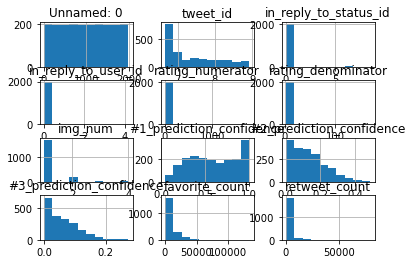

In [185]:
Data.hist();